In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.shape

(41188, 21)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

In [6]:
# no null values found!
# pd.isnull(df).sum()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [7]:
maxd = df['duration'].max()
mind = df['duration'].min()
modd = df['duration'].median()
mead = df['duration'].mean()

print('max duration: ', maxd)
print('min duration: ', mind)
print('median duration: ', modd)
print('mean duration: ', mead)

max duration:  4918
min duration:  0
median duration:  180.0
mean duration:  258.3158150378861


In [8]:
agemax = df['age'].max()
agemin = df['age'].min()
agemea = df['age'].mean()
agemed = df['age'].median()
agemo = df['age'].mode()

print("max age: ", agemax)
print("min age: ", agemin)
print("mean age: ", agemea)
print("median age: ", agemed)
print("mode age: ", agemo)

max age:  98
min age:  17
mean age:  40.02380027200311
median age:  38.0
mode age:  0    31
Name: age, dtype: int64


In [9]:
from scipy.stats import zscore
import numpy as np

In [14]:
# outlier detection & treatment with z-score method

# Selecting numeric columns
df_numeric = df[['duration', 'campaign', 'pdays']]

# Computing absolute z-scores (force conversion to array)
z_scores = np.abs(zscore(df_numeric.to_numpy()))

# Capping outliers using 95th percentile
for i, col in enumerate(df_numeric.columns):
    upper_limit = df[col].quantile(0.95)
    df[col] = np.where(z_scores[:, i] > 3, upper_limit, df[col])

In [12]:
# age IQR

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Feature transformation using Encoding

# Label Encoding (for binary categorical columns)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['default', 'housing', 'loan', 'y']:
    df[col] = le.fit_transform(df[col])

In [15]:
# One hot encoding for multi-category columns

df = pd.get_dummies(df, columns=['job', 'education', 'poutcome'], drop_first=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  float64
 1   marital                        41176 non-null  object 
 2   default                        41176 non-null  int64  
 3   housing                        41176 non-null  int64  
 4   loan                           41176 non-null  int64  
 5   contact                        41176 non-null  object 
 6   month                          41176 non-null  object 
 7   day_of_week                    41176 non-null  object 
 8   duration                       41176 non-null  float64
 9   campaign                       41176 non-null  float64
 10  pdays                          41176 non-null  float64
 11  previous                       41176 non-null  int64  
 12  emp.var.rate                   41176 non-null  floa

The necessary steps for cleaning the data have been performed.

# EDA

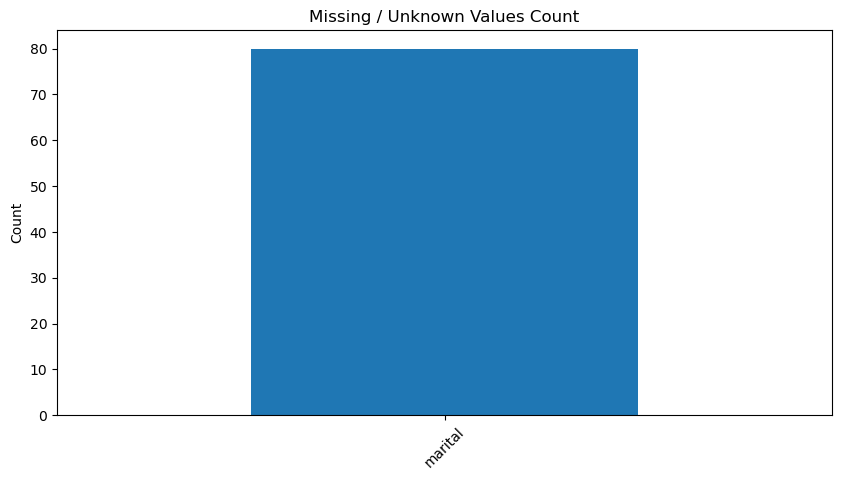

In [17]:
# plotting unknown/Nan values

missing_counts = {}

for col in df.columns:
    if df[col].dtype == 'object':
        count_unknown = (df[col] == 'unknown').sum()
        missing_counts[col] = count_unknown
    else:
        count_nan = df[col].isna().sum()
        missing_counts[col] = count_nan

missing_series = pd.Series(missing_counts).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
missing_series[missing_series > 0].plot(kind='bar')
plt.title('Missing / Unknown Values Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
for col in ['default', 'housing', 'loan']:
    print(f"{col}: {(df[col] == 'unknown').sum()}")

default: 0
housing: 0
loan: 0


In [19]:
# checking for  null/ nan values in education levels

for col in ['education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown']:
    print(f"{col}: {(df[col] == 'unknown').sum()}")

education_basic.6y: 0
education_basic.9y: 0
education_high.school: 0
education_illiterate: 0
education_professional.course: 0
education_university.degree: 0
education_unknown: 0


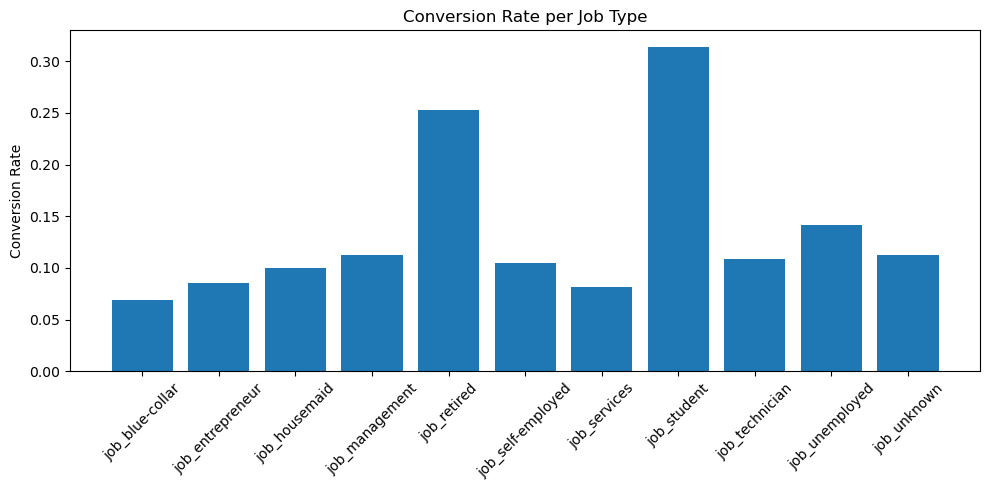

In [20]:
# Displaying how many people are in each job category

# Getting all job columns
job_cols = [col for col in df.columns if col.startswith('job_')]

# Calculating conversion rate per job
conversion_rates = {}
for job in job_cols:
    conversion_rate = df[df[job] == 1]['y'].mean()
    conversion_rates[job] = conversion_rate

# Plot
plt.figure(figsize=(10,5))
plt.bar(conversion_rates.keys(), conversion_rates.values())
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate per Job Type')
plt.tight_layout()
plt.show()

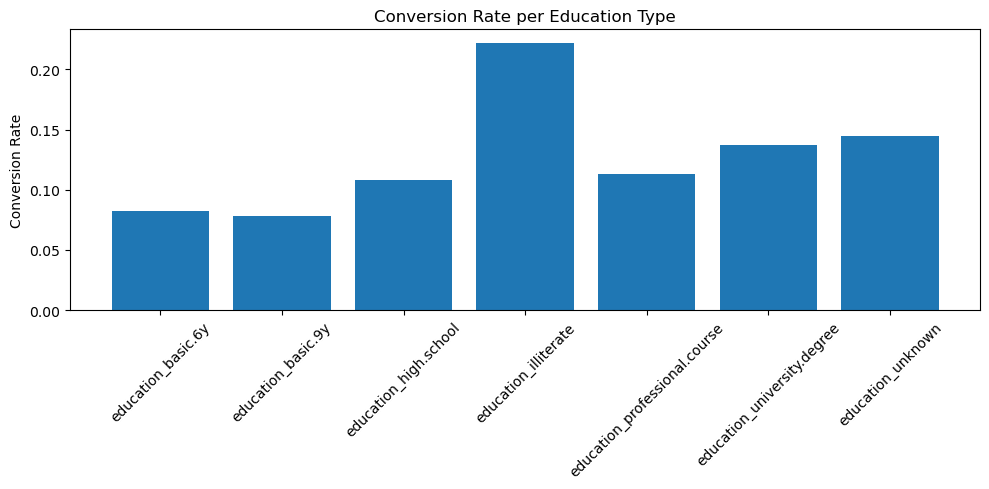

In [21]:
# displaying how many are in education level category

# Getting all education columns
education_cols = [col for col in df.columns if col.startswith('education_')]

# Calculating conversion rate per education
conversion_rates = {}
for education in education_cols:
    conversion_rate = df[df[education] == 1]['y'].mean()
    conversion_rates[education] = conversion_rate

# Plot
plt.figure(figsize=(10,5))
plt.bar(conversion_rates.keys(), conversion_rates.values())
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate per Education Type')
plt.tight_layout()
plt.show()

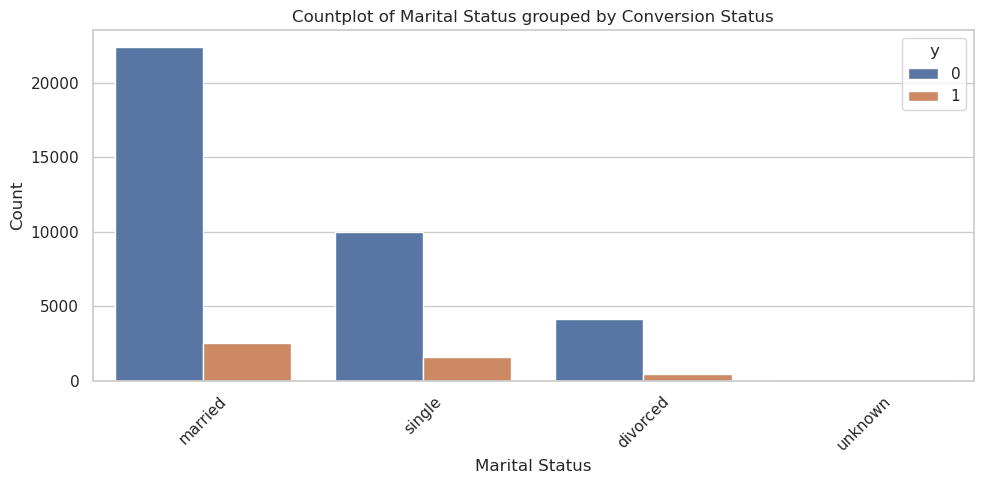

In [22]:
# displaying how many are in marital type category

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

# Countplot grouped by 'y' (hue)
sns.countplot(data=df, x='marital', hue='y', order=df['marital'].value_counts().index)

plt.title('Countplot of Marital Status grouped by Conversion Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.tight_layout()
plt.show()

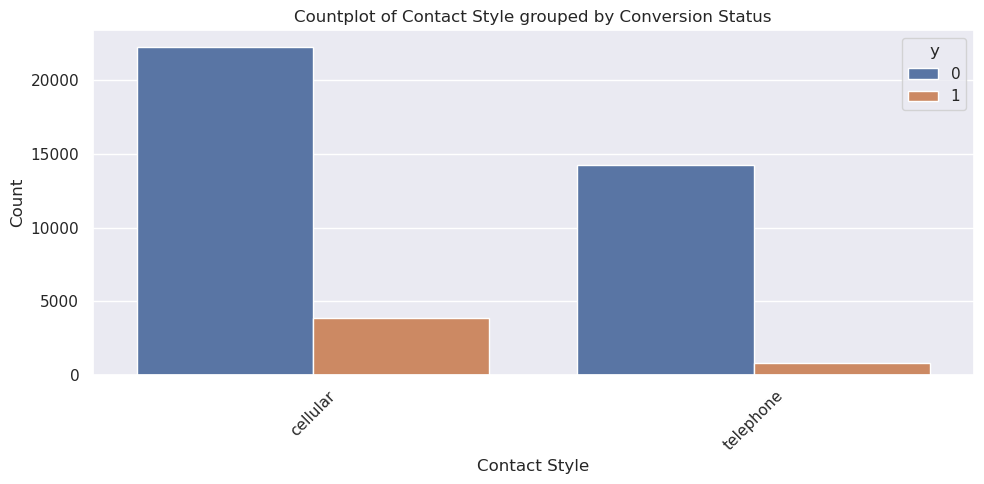

In [23]:
# displaying how many are in contact type category

sns.set(style="darkgrid")
plt.figure(figsize=(10,5))

# Countplot grouped by 'y' (hue)
sns.countplot(data=df, x='contact', hue='y', order=df['contact'].value_counts().index)

plt.title('Countplot of Contact Style grouped by Conversion Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Contact Style')
plt.tight_layout()
plt.show()

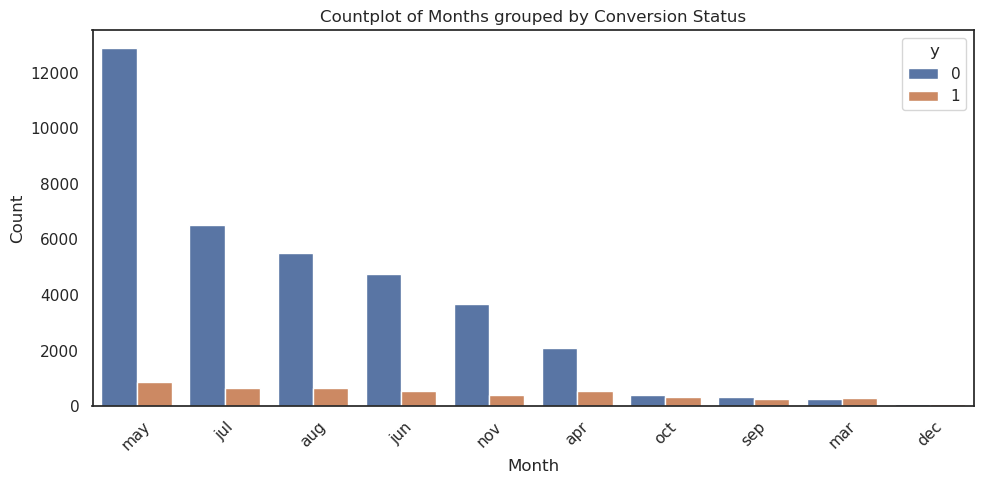

In [24]:
# displaying how many converted (or not) based on Months

sns.set(style="white")
plt.figure(figsize=(10,5))

# Countplot grouped by 'y' (hue)
sns.countplot(data=df, x='month', hue='y', order=df['month'].value_counts().index)

plt.title('Countplot of Months grouped by Conversion Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

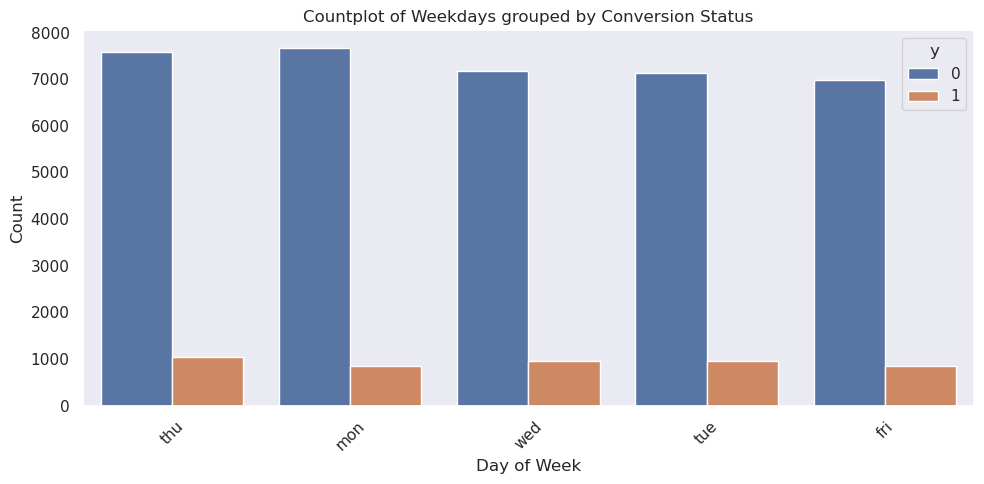

In [25]:
# displaying how many converted (or not) based on days of the week

sns.set(style="dark")
plt.figure(figsize=(10,5))

# Countplot grouped by 'y' (hue)
sns.countplot(data=df, x='day_of_week', hue='y', order=df['day_of_week'].value_counts().index)

plt.title('Countplot of Weekdays grouped by Conversion Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

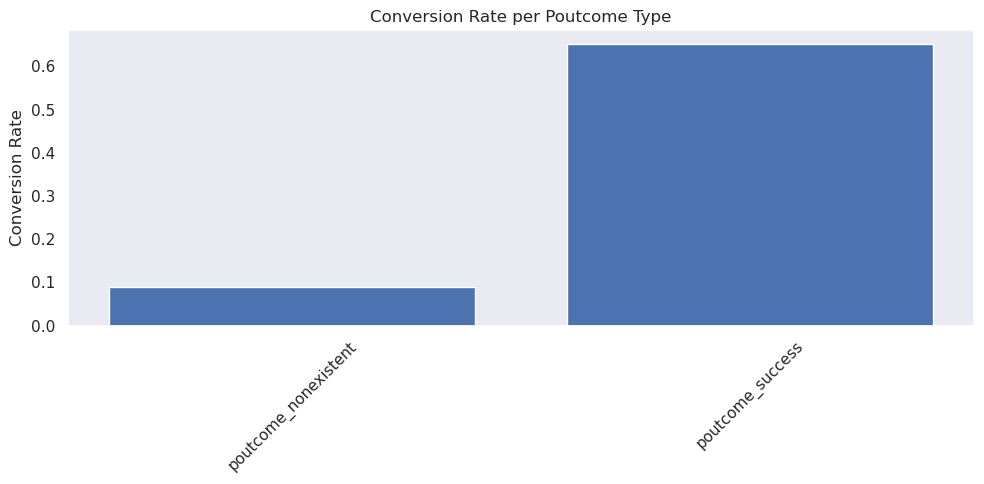

In [26]:
# displaying how many converted (or not) based on poutcome

poutcome_cols = [col for col in df.columns if col.startswith('poutcome_')]

# Calculating conversion rate per poutcome
conversion_rates = {}
for poutcome in poutcome_cols:
    conversion_rate = df[df[poutcome] == 1]['y'].mean()
    conversion_rates[poutcome] = conversion_rate

# Plot
plt.figure(figsize=(10,5))
plt.bar(conversion_rates.keys(), conversion_rates.values())
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate per Poutcome Type')
plt.tight_layout()
plt.show()

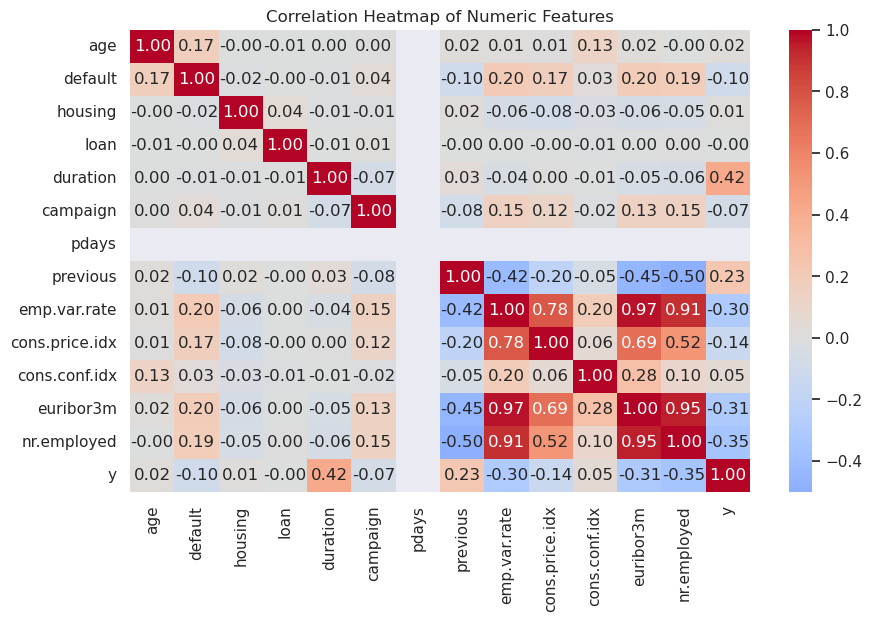

In [27]:
# plotting a correlation heatmap for numerical values

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# correlation matrix
corr = numeric_df.corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()